In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Family Income and Expenditure.csv')
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [2]:
df.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [3]:
df['Household Head Occupation'] = df['Household Head Occupation'].fillna('NULL')
df['Household Head Class of Worker'] = df['Household Head Class of Worker'].fillna('NULL')

In [4]:
categoricals = ['Region', 'Main Source of Income', 'Household Head Sex', 'Household Head Marital Status', 
                'Household Head Highest Grade Completed', 'Household Head Job or Business Indicator', 
                'Household Head Occupation', 'Household Head Class of Worker', 'Type of Household', 
                'Type of Building/House', 'Type of Roof', 'Type of Walls', 'Tenure Status', 'Toilet Facilities', 
                'Main Source of Water Supply']

labelencoder = LabelEncoder()

for i in categoricals:
    df[i] = labelencoder.fit_transform(df[i])

df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,1,117848,2,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,1,67766,2,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,1,61609,2,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,1,78189,2,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,1,94625,2,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,16,44875,0,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,16,31157,0,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,16,45882,0,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,16,81416,0,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


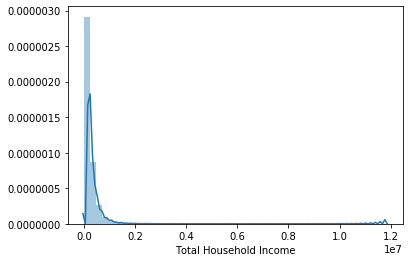

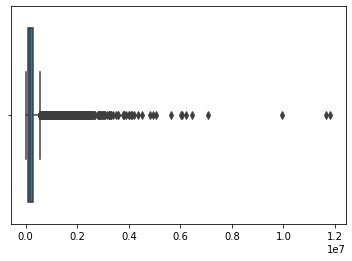

In [5]:
sns.distplot(a=df['Total Household Income'], hist=True)
plt.show()

sns.boxplot(df['Total Household Income'].values)
plt.show()

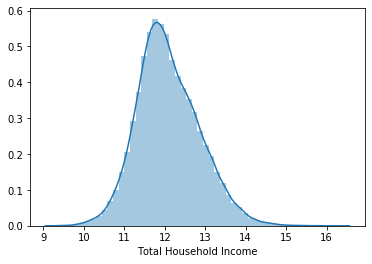

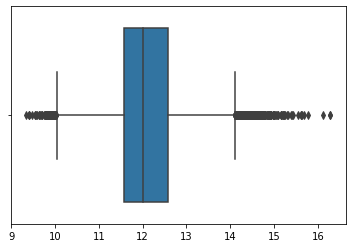

In [15]:
sns.distplot(a=np.log(df['Total Household Income']), hist=True)
plt.show()

sns.boxplot(np.log(df['Total Household Income'].values))
plt.show()

In [6]:
X = df.drop('Total Household Income', axis=1).values
y = df['Total Household Income'].values
#y = y / np.max(y)
#y = np.log(df['Total Household Income'].values) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 4)
print("train: {}, test: {}".format(X_train.shape[0], X_test.shape[0]))

normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

train: 37389, test: 4155


In [7]:
#training
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

#print("bias is "+str(lin_reg.intercept_))
#print("coefficients  is "+str(lin_reg.coef_))

y_train_pred = lin_reg.predict(X_train)

mae = mean_absolute_error(y_train_pred, y_train)
mse = mean_squared_error(y_train_pred, y_train)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

prediction for training set:
MAE is: 50171.64616234391
MSE is: 11271476453.691784
RMSE is: 106167.20987994262


In [8]:
#testing
y_test_pred = lin_reg.predict(X_test)

mae = mean_absolute_error(y_test_pred, y_test)
mse = mean_squared_error(y_test_pred, y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

prediction for testing set:
MAE is: 55140.562615748146
MSE is: 36971075970.86683
RMSE is: 192278.64148382895


In [9]:
y_test_pred

array([ 55820.33346706,  96524.33346706, 331800.33346706, ...,
       173138.33346706, 241320.33346706, 213856.33346706])

In [10]:
y_test

array([ 48683, 194910, 272675, ..., 187098, 217480, 167506], dtype=int64)

In [11]:
df['Total Household Income'].skew()

8.896631047132981

In [12]:
np.log(df['Total Household Income']).skew()

0.3819489926163352

In [13]:
# Q1 = np.percentile(df['Total Household Income'], 25, interpolation = 'midpoint')
 
# Q3 = np.percentile(df['Total Household Income'], 75, interpolation = 'midpoint')

# IQR = Q3 - Q1

# print("Old Shape: ", df['Total Household Income'].shape)

# upper = np.where(df['Total Household Income'] >= (Q3+1.5*IQR))
# lower = np.where(df['Total Household Income'] <= (Q1-1.5*IQR))

# df['Total Household Income'].drop(upper[0], inplace = True)
# df['Total Household Income'].drop(lower[0], inplace = True)
 
# print("New Shape: ", df['Total Household Income'].shape)

In [14]:
# sns.distplot(a=df['Total Household Income'], hist=True)
# plt.show()

# sns.boxplot(df['Total Household Income'].values)
# plt.show()